In [35]:
import nltk
nltk.download('treebank')
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/kirillvladimirov/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [5]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
 
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(nltk.corpus.treebank.tagged_words()))

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
Tagged sentences:  3914
Tagged words: 100676


In [7]:
sentences, sentence_tags =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))
 
# Let's see how a sequence looks
 
print(sentences[5])
print(sentence_tags[5])

['Lorillard' 'Inc.' ',' 'the' 'unit' 'of' 'New' 'York-based' 'Loews'
 'Corp.' 'that' '*T*-2' 'makes' 'Kent' 'cigarettes' ',' 'stopped' 'using'
 'crocidolite' 'in' 'its' 'Micronite' 'cigarette' 'filters' 'in' '1956'
 '.']
['NNP' 'NNP' ',' 'DT' 'NN' 'IN' 'JJ' 'JJ' 'NNP' 'NNP' 'WDT' '-NONE-' 'VBZ'
 'NNP' 'NNS' ',' 'VBD' 'VBG' 'NN' 'IN' 'PRP$' 'NN' 'NN' 'NNS' 'IN' 'CD'
 '.']


In [10]:
len(sentences), len(sentence_tags)

(3914, 3914)

In [12]:
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, sentence_tags, test_size=0.2)

In [14]:
words, tags = set([]), set([])
 
for s in train_sentences:
    for w in s:
        words.add(w.lower())

for ts in train_tags:
    for t in ts:
        tags.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0  # The special value used to padding

In [16]:
len(word2index), len(tag2index)

(10156, 47)

In [17]:
train_sentences_X, test_sentences_X, train_tags_y, test_tags_y = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])

for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])

print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])
 

[7477, 1983, 9539, 9386, 4794, 8973, 6551, 9865, 3832, 6929, 9604, 1128, 1512, 1677, 7761, 7083, 7876, 5534, 8548, 7282, 856, 2396, 5268, 2987, 9780, 4782, 6564, 7859, 9577]
[8973, 183, 4286, 1953, 5588, 6602, 6929, 9865, 3491, 541, 6071, 2830, 6929, 8298, 1515, 183, 6418, 1605, 8730, 2166, 9577]
[6, 18, 6, 43, 11, 21, 11, 29, 15, 39, 43, 43, 42, 17, 1, 2, 11, 15, 35, 33, 40, 16, 22, 40, 17, 8, 15, 15, 45]
[21, 6, 15, 18, 43, 30, 39, 29, 18, 40, 44, 44, 39, 15, 17, 6, 44, 44, 44, 44, 45]


In [20]:
len(train_sentences_X[0])

29

In [21]:
MAX_LENGTH = len(max(train_sentences_X, key=len))
print(MAX_LENGTH)  # 271

271


In [23]:
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(test_tags_y[0])
 

[7477 1983 9539 9386 4794 8973 6551 9865 3832 6929 9604 1128 1512 1677
 7761 7083 7876 5534 8548 7282  856 2396 5268 2987 9780 4782 6564 7859
 9577    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [25]:
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 271, 128)          1299968   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 271, 512)          788480    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 271, 47)           24111     
_________________________________________________________________
activation_1 (Activation)    (None, 271, 47)           0         
Total params: 2,112,559
Trainable params: 2,112,559
Non-trainable params: 0
_________________________________________________________________


In [27]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [28]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [41]:
train_sentences_X.shape

(3131, 271)

In [42]:
cat_train_tags_y.shape

(3131, 271, 47)

In [30]:
%%time

history = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2504 samples, validate on 627 samples
Epoch 1/40
2504/2504 [==============================] - 62s 25ms/step - loss: 1.2896 - accuracy: 0.8593 - val_loss: 0.3790 - val_accuracy: 0.9077
Epoch 2/40
2504/2504 [==============================] - 73s 29ms/step - loss: 0.3363 - accuracy: 0.9055 - val_loss: 0.3142 - val_accuracy: 0.9079
Epoch 3/40
2504/2504 [==============================] - 87s 35ms/step - loss: 0.3132 - accuracy: 0.9119 - val_loss: 0.3026 - val_accuracy: 0.9179
Epoch 4/40
2504/2504 [==============================] - 67s 27ms/step - loss: 0.3027 - accuracy: 0.9172 - val_loss: 0.2950 - val_accuracy: 0.9183
Epoch 5/40
2504/2504 [==============================] - 62s 25ms/step - loss: 0.2946 - accuracy: 0.9173 - val_loss: 0.2876 - val_accuracy: 0.9186
Epoch 6/40
2504/2504 [==============================] - 60s 24ms/step - loss: 0.2865 - accuracy: 0.9175 - val_loss: 0.2802 - val_accuracy: 0.9189
Epoch 7/40
2504/2504 [==============================] - 75s 30ms/step - loss:

In [32]:
models_root = "../../models/lstm-pos-tagger/"
model.save(models_root+"simple_lstm.h5")

In [38]:
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

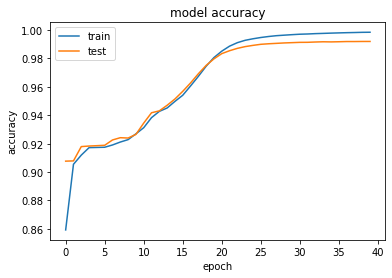

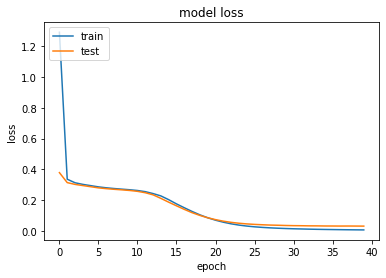

In [39]:
show_history(history)

In [40]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   # acc: 99.09751977804825

783/783 [==============================] - 10s 12ms/step
accuracy: 99.11919832229614


In [54]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

In [55]:
X.shape, Y.shape

((20, 3, 1), (20, 3, 1))

In [56]:
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, 1)))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [57]:
from numpy import zeros, newaxis

In [58]:
train_sentences_X = train_sentences_X[:, :, newaxis]

In [59]:
train_sentences_X.shape

(3131, 1, 1, 271)

In [60]:
target = to_categorical(train_tags_y, len(tag2index))

In [61]:
target.shape

(3131, 271, 47)

In [62]:
target = target[:, :, :]
target.shape

(3131, 271, 47)

In [63]:
history = model.fit(train_sentences_X, target, batch_size=128, epochs=40, validation_split=0.2)

ValueError: Error when checking input: expected input_4 to have 3 dimensions, but got array with shape (3131, 1, 1, 271)

In [ ]:
# https://nlpforhackers.io/lstm-pos-tagger-keras/